# **Image Classification using PyTorch**

In this programming assignment, we are going to be performing image classification using convolutional neural networks. We will use the CIFAR-10 data set.

The **CIFAR-10** dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

To implement the CNN, we will use PyTorch.


##**STEP 0: Import Necessary Libraries**

In [5]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

##**STEP 1: Load and Normalize Dataset**
(TODO)

Using torchvision, it’s extremely easy to load CIFAR10.

The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1]. 

We have given you the code for transformations; you have to use it while creating trainloader and testloaders.

Use batch size of 4 images.
Store data in root file of './data'

Helpful Links:


1.   [Torchvision for CIFAR10](https://pytorch.org/vision/stable/datasets.html#cifar)
2.   [DataLoaders](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)



In [6]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

##### INPUT CODE HERE (~4 lines of code) ######
cifar10_train_data = torchvision.datasets.CIFAR10('./data', True, transform, None, True)
trainloader = torch.utils.data.DataLoader(cifar10_train_data, batch_size)
cifar10_test_data = torchvision.datasets.CIFAR10('./data', False, transform, None, True)
testloader = torch.utils.data.DataLoader(cifar10_test_data, batch_size)


##############################################

classes = ('Airplane', 'Automobie', 'Bird', 'Cat',
           'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck')

Files already downloaded and verified
Files already downloaded and verified


##**STEP 2: Function to Display Images**

Here, you can display a random batch of images from the dataloaders

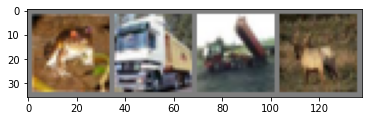

True Labels:
Frog  Truck Truck Deer 


In [39]:

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print("True Labels:")
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))


##**STEP 3: Define a CNN**
(TODO)

Here, you must create the structure of the CNN as given in the following image. Construct a LeNet-5 style CNN network, using PyTorch functions. LeNet-5 is shown in the figure below. Note that the network is not exactly the same as described in the original, 1998, paper.

The forward function has been given to you; all you have to do is define the variables in the __init__ function.

We ask you to experiment with varying the parameters of the network but use the following to start with:

1. The first layer has six 5 x 5 convolution filters, stride as 1, each followed by a max-pooling layer of
2 x 2 with stride as 2.
2. Second convolution layer has sixteen 5 x 5 convolution filters, stride as 1, each followed by 2 x 2 max-pooling with stride as 2.
3. Next is a fully connected layer of dimensions 120 followed by another fully connected layer of dimensions 84.
4. Next is a fully connected layer of dimensions 10 that gives unnormalized scores of the 10 classes.
5. All activation units should be ReLU.


Helpful Links for Building CNNs using PyTorch:

1.   [2D Convolutional Layers](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)
2.   [Max Pooling Layers](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html)
3.   [2D Convolutional Layers](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)
4.   [Fully Connected Layers](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)



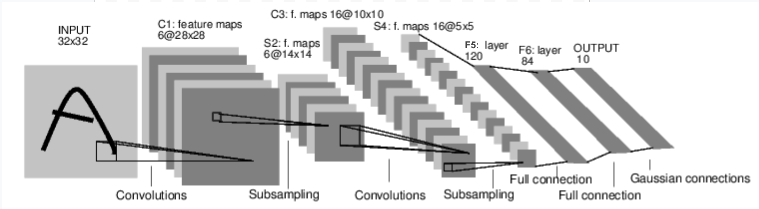

In [40]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()

        
        ##### INPUT CODE HERE (~6 lines of code) ######

        self.conv1 = nn.Conv2d(3, 6, 5, stride=1)
        self.pool = nn.MaxPool2d(2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, 5, stride=1)
        self.fc1 = nn.Linear(400, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
        ##############################################

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


##**STEP 4: Define a Loss Function and Optimizer**
(TODO)

Use a Classification Cross-Entropy Loss function and SGD with momentum as an optimizer.

Helpful Links:

1.   [Cross-Entropy Loss Function](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)
2.   [SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html)


In [41]:
import torch.optim as optim

##### INPUT CODE HERE (~2 lines of code) ######

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

##############################################



##**STEP 5: Train the Network**
(TODO)

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.

1. First find outputs by passing inputs through your neural net.
2. Calculate the loss using the loss function from **STEP 4** and store in variable 'loss'.
3. Backpropogate the loss.
4. Perform single optimization step using optimizer object.


Helpful Links:

1.   [Backpropogation](https://pytorch.org/docs/stable/generated/torch.Tensor.backward.html)
2.   [Optimize](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD.step)

In [42]:

epochs = 2

for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()
        
        ##### INPUT CODE HERE (~4 lines of code) ######
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        ##############################################

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.229
[1,  4000] loss: 1.919
[1,  6000] loss: 1.700
[1,  8000] loss: 1.557
[1, 10000] loss: 1.531
[1, 12000] loss: 1.465
[2,  2000] loss: 1.403
[2,  4000] loss: 1.386
[2,  6000] loss: 1.330
[2,  8000] loss: 1.307
[2, 10000] loss: 1.320
[2, 12000] loss: 1.272
Finished Training


You can save your trained model using:

In [43]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

##**STEP 6: Predict on Sample Images**

We have trained the network for 2 passes over the training dataset. But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network outputs, and checking it against the ground-truth. If the prediction is correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.

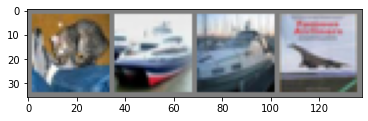

GroundTruth:  Cat   Ship  Ship  Airplane


In [44]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

You can now see what the neural network thinks these examples above are:

In [45]:
net = Net()
net.load_state_dict(torch.load(PATH))

outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  Cat   Ship  Ship  Airplane


##**STEP 7: Test the network on the test data**
(TODO)

You will now run the neural network on the entire test dataset and calculate the accuracy.

1. Calculate outputs by running images through the network.
2. The class with the highest energy is what we choose as prediction.
3. Find out number of correct predictions and store it in variable 'correct'.


Helpful Links:

1.   [torch.max](https://pytorch.org/docs/stable/generated/torch.max.html)


In [46]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs

with torch.no_grad():
    for data in testloader:

        images, labels = data
        total += labels.size(0)
        
        ##### INPUT CODE HERE (~3 lines of code) ######
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        
        ##############################################

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 55 %


##**STEP 8: Analyse Results**


Randomly picking a class out of 10 classes will result in 10% accuracy.

Any accuracy higher than 10% means that the neural net has learnt something.

We can find out what are the classes that performed well, and the classes that did not perform well.

In [47]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: Airplane is 54.0 %
Accuracy for class: Automobie is 81.1 %
Accuracy for class: Bird  is 33.5 %
Accuracy for class: Cat   is 40.7 %
Accuracy for class: Deer  is 46.7 %
Accuracy for class: Dog   is 30.3 %
Accuracy for class: Frog  is 56.1 %
Accuracy for class: Horse is 76.7 %
Accuracy for class: Ship  is 74.3 %
Accuracy for class: Truck is 57.6 %




---

